In [1]:
%matplotlib inline

In [2]:
import h5py
import numpy as np
from sklearn.metrics import explained_variance_score

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
saved_h5 = h5py.File('sad/saved/sadr.h5', 'r')
saved_sad = saved_h5['SAD'][:].astype('float32')
saved_chr = saved_h5['chr'][:]
saved_h5.close()
saved_sad.shape

(16, 4269)

In [4]:
this_h5 = h5py.File('sad/testrm/sad.h5', 'r')
this_sad = this_h5['SAD'][:].astype('float32')
this_chr = this_h5['chr'][:]
this_h5.close()
this_sad.shape

(16, 4269)

In [5]:
explained_variance_score(saved_sad.flatten(), this_sad.flatten())

0.9999999403953552

In [6]:
np.allclose(this_sad, saved_sad, atol=0.2, rtol=0.1)

True

In [12]:
np.allclose(saved_sad, this_sad, atol=0.2, rtol=0.2)

True

In [ ]:
np.testing.assert_allclose(saved_sad, this_value, atol=2e-1, rtol=1e-1)

1245 True


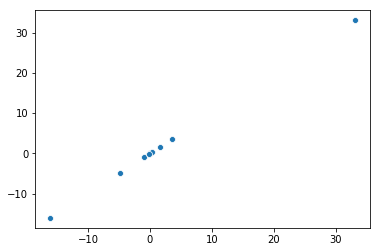

In [44]:
ti = np.random.choice(saved_sad.shape[1])
print(ti, np.allclose(saved_sad[:,ti], this_sad[:,ti], atol=1e-3, rtol=1e-3))
sns.scatterplot(saved_sad[:,ti], this_sad[:,ti])

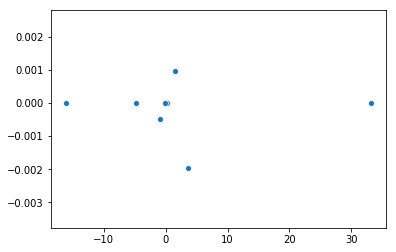

In [45]:
diff_ti = (saved_sad[:,ti] - this_sad[:,ti])
mean_ti = (saved_sad[:,ti] + this_sad[:,ti]) / 2
sns.scatterplot(mean_ti, diff_ti)

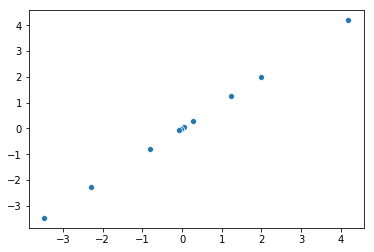

In [46]:
sns.scatterplot(np.arcsinh(saved_sad[:,ti]), np.arcsinh(this_sad[:,ti]))

In [18]:
diff = (saved_sad - this_sad).flatten()
print(diff.max())

max_where = np.where(diff >= diff.max()*0.99)[0]
max_where

358.90283


array([693872])

In [19]:
saved_sad.flatten()[max_where[0]], this_sad.flatten()[max_where[0]]

(444.0, 85.09717)

In [12]:
ldiff = (np.arcsinh(saved_sad) - np.arcsinh(this_sad)).flatten()
print(ldiff.max())
np.where(ldiff >= ldiff.max()*0.9)

4.860484


(array([291106, 297523, 317053, 317054, 317055, 317056, 317057, 317058,
        317059, 317060, 317061, 317062, 317330, 317331, 317332, 317333,
        317334, 317335, 317336, 317337, 317338, 317339, 317340, 330724,
        330725, 334628, 334629, 334630, 334631, 334632, 334633, 334634,
        334635, 334636, 334637, 335188, 335189, 378706, 378707, 378708,
        378709, 378710, 378711, 378712, 378713, 378714, 378715, 378716,
        378717, 378718, 435628, 435907, 435908, 435909, 435910, 435911,
        435912, 435913, 441487, 441488, 441489, 441490, 441491, 441492,
        441493, 441494, 441495, 471053, 471054, 471055, 471056, 471057,
        471058, 471059, 471060, 471061, 471062, 471063, 471064, 471065,
        471066, 471067, 471068, 471069, 471070, 497845, 497846, 497847,
        549176, 549177, 549178, 549179, 549180, 549181, 549182, 549183,
        549184, 549185, 573175, 573176, 590194, 590195, 590196, 590197,
        590198, 590199, 590200, 590201, 590202, 608050, 608051, 

In [13]:
saved_sad.flatten()[17452], this_sad.flatten()[17452]

(0.23608398, 0.17523193)